In [2]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import numpy as np
from scipy.misc import imread
from scipy.misc import imresize
from scipy.misc import imsave
import glob
import random

from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
#from keras.applications.resnet50 import preprocess_input

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
#from keras.applications.vgg19 import preprocess_input as preprocess_vgg
from keras.applications.inception_v3 import preprocess_input as inception_preprocess

#from keras.applications.inception_resnet_v2 import preprocess_input

import numpy as np

import keras
import copy
import cv2

from keras.models import *
from keras.layers import *
from keras.optimizers import *

import numpy as np 
import os
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [12]:
path = '../data/'
savepath = '../data/'
#images = glob.glob(path+'new_data/*.npy')
tile_sizes = np.loadtxt(path+'tile_sizes.txt', dtype='int')
tile_sizes = tile_sizes[10:800]
images_sampled = {}
for tile in tile_sizes:
    for i in range(1, 500):
        images_sampled.setdefault(tile[0]*30+i, []).append(tile[1])
print(len(images_sampled.keys()))

949


In [24]:
def myGenerator(batch_size):
    s = 192
    while True:
        index_list = random.sample(images_sampled.keys(), batch_size)
        alldata_x = []
        alldata_y = []
        for i in index_list:
            frame = path+'sources/nparrs_384/frame'+str(i)+'.npy'
            frame = np.load(frame)
            tile_index = random.choice(images_sampled[i])
            
            tmp = imresize(frame[tile_index], (s, 192))
            temp  = imresize(frame[tile_index], (24, 24))
            temp  = imresize(temp, (s, 192))
            
            alldata_x.append(temp)
            #alldata_y.append(frame[tile_index])
            alldata_y.append(tmp)
        
        alldata_x = np.array(alldata_x)
        alldata_y = np.array(alldata_y)
        
        alldata_y = (alldata_y.astype(np.float32) - 127.5) / 127.5
        alldata_x = alldata_x.astype(np.float32)/255.0
        
        yield alldata_x, alldata_y

x = myGenerator(500)
xtrain, ytrain = next(x)
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


xtrain shape: (500, 192, 192, 3)
ytrain shape: (500, 192, 192, 3)


In [65]:
import numpy 
import math
import cv2
import time

def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

data = []
for i in range(5):
    cv2.imwrite(path+'xface' + str(i) + '.jpg', xtrain[i])
    cv2.imwrite(path+'yface' + str(i) + '.jpg', ytrain[i])
    img1 = cv2.imread(path+'xface' + str(i) + '.jpg')
    img2 = cv2.imread(path+'yface' + str(i) + '.jpg')
    d = psnr(img1, img2)
    print (d)

100
54.98640710081604
100
79.17284820376054
69.83483471179272


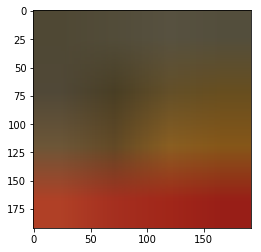

In [51]:
plt.imshow(xtrain[200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


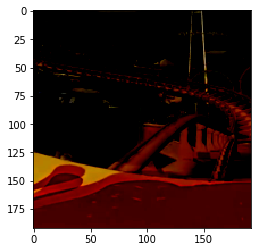

In [50]:
plt.imshow(ytrain[200])

In [58]:
def psnr2(target, ref):
    # assume RGB image
    target_data = numpy.array(target, dtype=float)
    ref_data = numpy.array(ref, dtype=float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(numpy.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

In [61]:
d = psnr2(ytrain[100], xtrain[100])
print (d)

50.43966780786802


In [91]:
data = []
for i in range(100):
    img1 = cv2.imread(path+'test/frame_real'+str(i)+'.png')
    img2 = imresize(img1, (1, 1))
    img2 = imresize(img2, (384, 384))
    d = psnr(img1, img2)
    data.append(d)
    print(d)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


28.28093333735203
27.75066084935322
27.97305946161486
28.35734645402992
27.97332843597033
27.915793514051074
28.240574699127595
28.12382632808768
28.371180773378597
27.752681797322776
27.870924748281865
27.838380698812657
28.279441185845073
27.411155034865338
27.780359922300487
28.161183824440876
27.952052892107243
27.57232105407988
28.04119940311827
27.986212019205198
27.720265203011145
27.903968787954028
27.789379779881827
27.47219139949927
28.391840808908533
28.767573537088715
28.03041856409856
27.368557376751433
28.208424797533183
28.2759363165901
28.380556028293675
28.44577007186572
27.58724084546565
27.979556141524185
28.219036359092357
28.208589610593265
28.201529046447543
27.01771844203702
27.66335715113939
28.502309571955955
27.42504611623145
28.181835534375832
28.524278138777397
27.770749573125002
28.4635299841519
27.466435499117434
28.330039656106514
27.68889681729604
27.877838408457706
28.362914456167548
28.670627395728808
27.913186492402616
27.75277421679653
28.48849872867

In [86]:
np.mean(data)

28.012225713257795

In [89]:
"""
Video Quality Metrics
Copyright (c) 2014 Alex Izvorski <aizvorski@gmail.com>

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

import numpy
from scipy.ndimage import gaussian_filter

from numpy.lib.stride_tricks import as_strided as ast

"""
Hat tip: http://stackoverflow.com/a/5078155/1828289
"""
def block_view(A, block=(3, 3)):
    """Provide a 2D block view to 2D array. No error checking made.
    Therefore meaningful (as implemented) only for blocks strictly
    compatible with the shape of A."""
    # simple shape and strides computations may seem at first strange
    # unless one is able to recognize the 'tuple additions' involved ;-)
    shape = (A.shape[0]/ block[0], A.shape[1]/ block[1])+ block
    strides = (block[0]* A.strides[0], block[1]* A.strides[1])+ A.strides
    return ast(A, shape= shape, strides= strides)


def ssim(img1, img2, C1=0.01**2, C2=0.03**2):

    bimg1 = block_view(img1, (4,4))
    bimg2 = block_view(img2, (4,4))
    s1  = numpy.sum(bimg1, (-1, -2))
    s2  = numpy.sum(bimg2, (-1, -2))
    ss  = numpy.sum(bimg1*bimg1, (-1, -2)) + numpy.sum(bimg2*bimg2, (-1, -2))
    s12 = numpy.sum(bimg1*bimg2, (-1, -2))

    vari = ss - s1*s1 - s2*s2
    covar = s12 - s1*s2

    ssim_map =  (2*s1*s2 + C1) * (2*covar + C2) / ((s1*s1 + s2*s2 + C1) * (vari + C2))
    return numpy.mean(ssim_map)

# FIXME there seems to be a problem with this code
def ssim_exact(img1, img2, sd=1.5, C1=0.01**2, C2=0.03**2):

    mu1 = gaussian_filter(img1, sd)
    mu2 = gaussian_filter(img2, sd)
    mu1_sq = mu1 * mu1
    mu2_sq = mu2 * mu2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = gaussian_filter(img1 * img1, sd) - mu1_sq
    sigma2_sq = gaussian_filter(img2 * img2, sd) - mu2_sq
    sigma12 = gaussian_filter(img1 * img2, sd) - mu1_mu2

    ssim_num = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2))

    ssim_den = ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))

    ssim_map = ssim_num / ssim_den
    return numpy.mean(ssim_map)

In [ ]:
data = []
for i in range(100):
    img1 = cv2.imread(path+'test/frame_real'+str(i)+'.png')
    img2 = imresize(img1, (1, 1))
    img2 = imresize(img2, (384, 384))
    d = ssim_exact(img1/25, img2)
    data.append(d)
    print(d)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


427.9770475447437
1825.452799530625
1076.792436780297
3297.91180227394
648.4816682613289
366.45456222601786
559.4540782213752
806.8369401238514
1167.2783288519424
4502.9683925974905
2160.5186485006757
267.4420386186358
636.5260702057758
2942.4869562513495
487.93830893207735
1178.4343974947083
2129.736313991104
359.6887004812189
5969.561235795632
3592.917565602792
602.3960596545191
1956.7819564916203
544.7500815427306
941.5351554913386
1282.2456927789506
1120.9953400908566
1713.2814623518525
1367.3678778708054
473.6939034135731
559.4729739892773
3387.9153010744817
3452.1885720943083
4944.203310711565
2168.219088816646
461.2068996087331
377.95411995023125
431.77975272500674
4204.224562921603
846.9719316300974
311.49570819470466
3807.8355688009237
3011.7592134323445
3074.6668836557615
389.4257349695326
677.4360266056798
7502.757770266606
4207.7523582062895
2589.695173042131
1198.8908767067537
1273.7972697134992
996.2302586804163
1503.4457016562533
1532.290930292934
21267.73159226053
16976